In [229]:
import pandas as pd
import numpy as np

file = "data/BASE DE DATOS PCC.xlsx"
df = pd.read_excel(file)
df.head(10)


,Pedido,OP,Referencia,Maquina,Sección,Proceso,Usuario,Estado,Fabricadas,Fecha inicio,Fecha fin,Duración,Duración [min],Ayudante,Info. Extra 1
0,25301,6362,PT-0000001709,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,Pegar,dcardona,PLAY,12000,2024-01-28 12:07:29,2024-01-28 12:35:45,00:28:16,28.27,No,NaN
1,25301,6362,PT-0000001709,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,cambiorefe,dcardona,STOP,0,2024-01-28 11:49:01,2024-01-28 12:07:29,00:18:28,18.47,No,NaN
2,26146,7258,PT-0000000197,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,Pegar,dcardona,PLAY,28000,2024-01-29 07:29:18,2024-01-29 08:18:30,00:49:12,49.20,No,NaN
3,26146,7258,PT-0000000197,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,cambiorefe,dcardona,STOP,0,2024-01-29 06:53:59,2024-01-29 07:29:18,00:35:19,35.32,No,NaN
4,26550,7685,PT-0000001846,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,jhenao,PLAY,24660,2023-08-24 00:15:33,2023-08-24 00:49:30,00:33:57,33.95,No,6.0
5,26550,7685,PT-0000001846,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,jhenao,STOP,0,2023-08-24 00:11:56,2023-08-24 00:15:33,00:03:37,3.62,No,6.0
6,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,cpiedrahit,PLAY,4200,2023-08-28 00:31:58,2023-08-28 01:01:06,00:29:08,29.13,No,2.0
7,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,cpiedrahit,PLAY,3320,2023-08-28 01:56:18,2023-08-28 02:28:50,00:32:32,32.53,No,2.0
8,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,cpiedrahit,STOP,0,2023-08-27 22:41:15,2023-08-27 23:59:59,01:18:44,78.73,No,2.0
9,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,cpiedrahit,STOP,0,2023-08-28 00:00:00,2023-08-28 00:18:40,00:18:40,18.67,No,2.0


In [230]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23651 entries, 0 to 23650
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pedido          23651 non-null  int64  
 1   OP              23651 non-null  int64  
 2   Referencia      23651 non-null  object 
 3   Maquina         23651 non-null  object 
 4   Sección         23651 non-null  object 
 5   Proceso         23651 non-null  object 
 6   Usuario         23651 non-null  object 
 7   Estado          23651 non-null  object 
 8   Fabricadas      23651 non-null  object 
 9   Fecha inicio    23651 non-null  object 
 10  Fecha fin       23651 non-null  object 
 11  Duración        23651 non-null  object 
 12  Duración [min]  23649 non-null  float64
 13  Ayudante        23651 non-null  object 
 14  Info. Extra 1   23590 non-null  float64
dtypes: float64(2), int64(2), object(11)
memory usage: 2.7+ MB


In [231]:
# Estadísticas básicas
df.describe(include='all').style.background_gradient(cmap = "plasma")

,Pedido,OP,Referencia,Maquina,Sección,Proceso,Usuario,Estado,Fabricadas,Fecha inicio,Fecha fin,Duración,Duración [min],Ayudante,Info. Extra 1
count,23651.000000,23651.000000,23651,23651,23651,23651,23651,23651,23651.000000,23651,23651,23651,23649.000000,23651,23590.000000
unique,nan,nan,842,13,3,17,34,2,3820.000000,23131,23125,9062,nan,1,nan
top,nan,nan,PT-0000001912,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,mmartinez,PLAY,0.000000,2024-10-31 00:00:00,2024-10-08 23:59:59,00:00:08,nan,No,nan
freq,nan,nan,660,5505,11154,9619,1389,13851,13235.000000,5,5,52,nan,23651,nan
mean,29108.328189,10384.506025,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,63.043219,nan,11.435566
std,852.693763,867.892852,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,57.925490,nan,13.725752
min,25301.000000,6362.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.070000,nan,1.000000
25%,28492.000000,9772.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,21.950000,nan,4.000000
50%,29158.000000,10445.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,45.280000,nan,6.000000
75%,29791.500000,11081.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,85.630000,nan,16.000000


In [232]:
import unidecode
# Eliminar acentos
df.columns = [unidecode.unidecode(col) for col in df.columns]
# Quitar espacios y estandarizar nombres de columnas
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns = df.columns.str.strip().str.lower().str.replace('.', '')
df.columns = df.columns.str.strip().str.lower().str.replace('[', '')
df.columns = df.columns.str.strip().str.lower().str.replace(']', '')
print(df.columns)

Index(['pedido', 'op', 'referencia', 'maquina', 'seccion', 'proceso',
       'usuario', 'estado', 'fabricadas', 'fecha_inicio', 'fecha_fin',
       'duracion', 'duracion_min', 'ayudante', 'info_extra_1'],
      dtype='object')


In [233]:
# Valores nulos
print(df.isnull().sum())

# Registros duplicados
print(f"Duplicados: {df.duplicated().sum()}")

pedido           0
op               0
referencia       0
maquina          0
seccion          0
proceso          0
usuario          0
estado           0
fabricadas       0
fecha_inicio     0
fecha_fin        0
duracion         0
duracion_min     2
ayudante         0
info_extra_1    61
dtype: int64
Duplicados: 0


In [234]:
#Verificar por posibles variantes sin variacion
single_unique = df.nunique()
single_unique

pedido           3092
op               3128
referencia        842
maquina            13
seccion             3
proceso            17
usuario            34
estado              2
fabricadas       3820
fecha_inicio    23131
fecha_fin       23125
duracion         9062
duracion_min     9117
ayudante            1
info_extra_1       42
dtype: int64

In [235]:
# Cambiar el tipo de variable de fabricadas
df['fabricadas'] = pd.to_numeric(df['fabricadas'], errors='coerce')
# Tipo de variable datetime
df['fecha_inicio'] = pd.to_datetime(df['fecha_inicio'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['fecha_fin'] = pd.to_datetime(df['fecha_fin'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [236]:
# Variables de fecha adicionales
df['dia_inicio'] = df['fecha_inicio'].dt.date
df['hora_inicio'] = df['fecha_inicio'].dt.hour
df['dia_semana_inicio'] = df['fecha_inicio'].dt.day_name()

In [237]:
df['dia_fin'] = df['fecha_fin'].dt.date
df['hora_fin'] = df['fecha_fin'].dt.hour
df['dia_semana_fin'] = df['fecha_fin'].dt.day_name()

In [238]:
df['duracion'] = pd.to_timedelta(df['duracion'])
df['duracion'] = df['duracion'].dt.total_seconds()
#Cambiar nombre de la columna
df.rename(columns={'duracion': 'duracion_sec'}, inplace=True)

In [239]:
errores = df[df['fecha_fin'] < df['fecha_inicio']]
print(f"Registros con fechas invertidas: {len(errores)}")

Registros con fechas invertidas: 0


In [240]:
#Eliminar columnas innecesarias
df.drop(columns=['ayudante','info_extra_1'], inplace=True)
# Llenar valor nulos de duracion_minutos con el calculo de la diferencia entre fecha_inicio y fecha_fin
# Calcular diferencia en minutos
diferencia_min = (df['fecha_fin'] - df['fecha_inicio']).dt.total_seconds() / 60

# Solo llenar valores faltantes
df['duracion_min'] = df['duracion_min'].fillna(diferencia_min)

In [241]:
# Valores nulos
print(df.isnull().sum())
print("*"*50)
# Registros duplicados
print(f"Duplicados: {df.duplicated().sum()}")
print("*"*50)
#Verificar por posibles variantes sin variacion
single_unique = df.nunique()
print(single_unique)

pedido               0
op                   0
referencia           0
maquina              0
seccion              0
proceso              0
usuario              0
estado               0
fabricadas           1
fecha_inicio         0
fecha_fin            0
duracion_sec         0
duracion_min         0
dia_inicio           0
hora_inicio          0
dia_semana_inicio    0
dia_fin              0
hora_fin             0
dia_semana_fin       0
dtype: int64
**************************************************
Duplicados: 0
**************************************************
pedido                3092
op                    3128
referencia             842
maquina                 13
seccion                  3
proceso                 17
usuario                 34
estado                   2
fabricadas            3819
fecha_inicio         23131
fecha_fin            23125
duracion_sec          9062
duracion_min          9118
dia_inicio             487
hora_inicio             24
dia_semana_inicio        7
di

In [242]:
#Valores unicos en variables categóricas
# Sección, usuario, estado, máquina
print("Valores únicos por columna:")
for col in ['estado', 'usuario', 'seccion','maquina','proceso']:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")
        print(df[col].value_counts())
        print("-"*50)

Valores únicos por columna:
estado: ['PLAY' 'STOP']
estado
PLAY    13851
STOP     9800
Name: count, dtype: int64
--------------------------------------------------
usuario: ['dcardona' 'jhenao' 'cpiedrahit' 'mmartinez' 'falzate' 'acalderon'
 'hgranada' 'agomez' 'avalencia' 'jpatino' 'lmejia' 'jzapata' 'rvelasquez'
 'aflorez' 'lvelasquez' 'bortega' 'nserna' 'aherrera' 'jcacevedo'
 'jpalacio' 'jacevedo' 'cbarrientos' 'lechavarria' 'lsanchez' 'dgaviria'
 'rsuarez' 'mhenao' 'jserna' 'ezapata' 'dmoreno' 'ksolorza' 'mquiroz'
 'jmartinez' 'bsuarez']
usuario
mmartinez      1389
hgranada       1352
rvelasquez     1329
agomez         1309
dcardona       1279
jcacevedo      1267
cpiedrahit     1265
lvelasquez     1248
falzate        1145
aflorez        1145
jacevedo       1122
aherrera       1092
avalencia      1067
jzapata        1050
bortega        1012
jhenao          985
jpatino         878
nserna          869
acalderon       742
lmejia          684
jpalacio        530
dgaviria        260
dmo

In [243]:
print("-"*50)
# Conteo general de estados
print(df['estado'].value_counts())
print("-"*50)
# Por usuario
print(df.groupby('usuario')['estado'].value_counts())
print("-"*50)
# Por sección
print(df.groupby('seccion')['estado'].value_counts())
print("-"*50)
# Por día
print("Dias de fabricación")
print("Inicio")
print(len(df.groupby('dia_inicio')['estado'].value_counts()))
print("Fin")
print(len(df.groupby('dia_fin')['estado'].value_counts()))
print("-"*50)

--------------------------------------------------
estado
PLAY    13851
STOP     9800
Name: count, dtype: int64
--------------------------------------------------
usuario      estado
acalderon    PLAY      406
             STOP      336
aflorez      PLAY      669
             STOP      476
agomez       PLAY      791
             STOP      518
aherrera     PLAY      610
             STOP      482
avalencia    PLAY      682
             STOP      385
bortega      PLAY      647
             STOP      365
bsuarez      PLAY        2
cbarrientos  PLAY      186
cpiedrahit   PLAY      687
             STOP      578
dcardona     PLAY      809
             STOP      470
dgaviria     PLAY      167
             STOP       93
dmoreno      STOP      100
             PLAY       91
ezapata      PLAY        5
falzate      STOP      582
             PLAY      563
hgranada     PLAY      711
             STOP      641
jacevedo     PLAY      581
             STOP      541
jcacevedo    PLAY      739
       

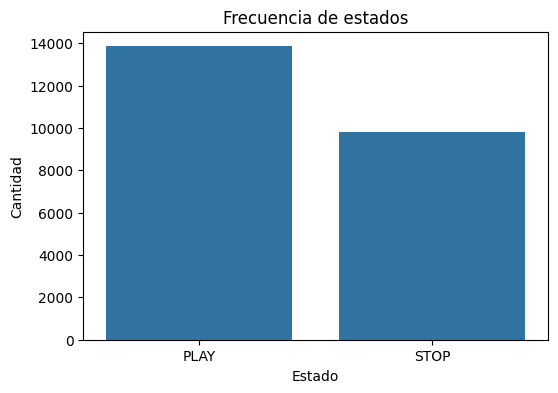

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo simple
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='estado', order=df['estado'].value_counts().index)
plt.title('Frecuencia de estados')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()

C:\Users\yosse\AppData\Local\Temp\ipykernel_24620\3059294993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duracion_usuario.values, y=duracion_usuario.index, palette='Blues_d')


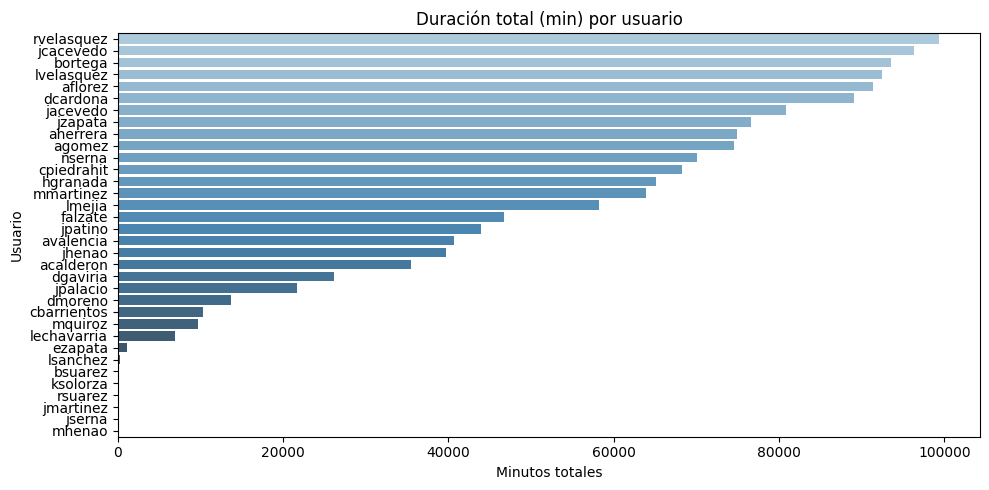

-


In [245]:
#Duracion total por usuario
# Sumar minutos por usuario
duracion_usuario = df.groupby('usuario')['duracion_min'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=duracion_usuario.values, y=duracion_usuario.index, palette='Blues_d')
plt.title('Duración total (min) por usuario')
plt.xlabel('Minutos totales')
plt.ylabel('Usuario')
plt.tight_layout()
plt.show()
print("-")

C:\Users\yosse\AppData\Local\Temp\ipykernel_24620\2817067950.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duracion_seccion.values, y=duracion_seccion.index, palette='Greens_d')


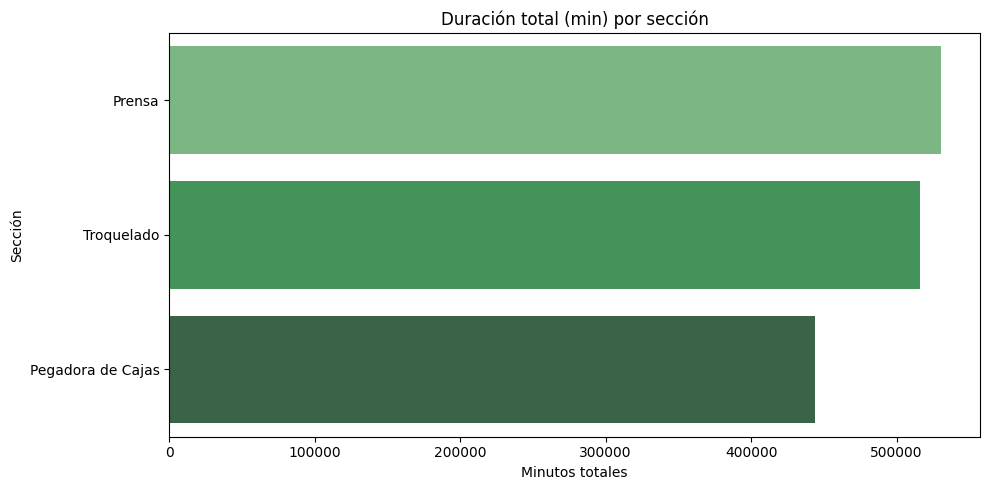

In [246]:
duracion_seccion = df.groupby('seccion')['duracion_min'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=duracion_seccion.values, y=duracion_seccion.index, palette='Greens_d')
plt.title('Duración total (min) por sección')
plt.xlabel('Minutos totales')
plt.ylabel('Sección')
plt.tight_layout()
plt.show()

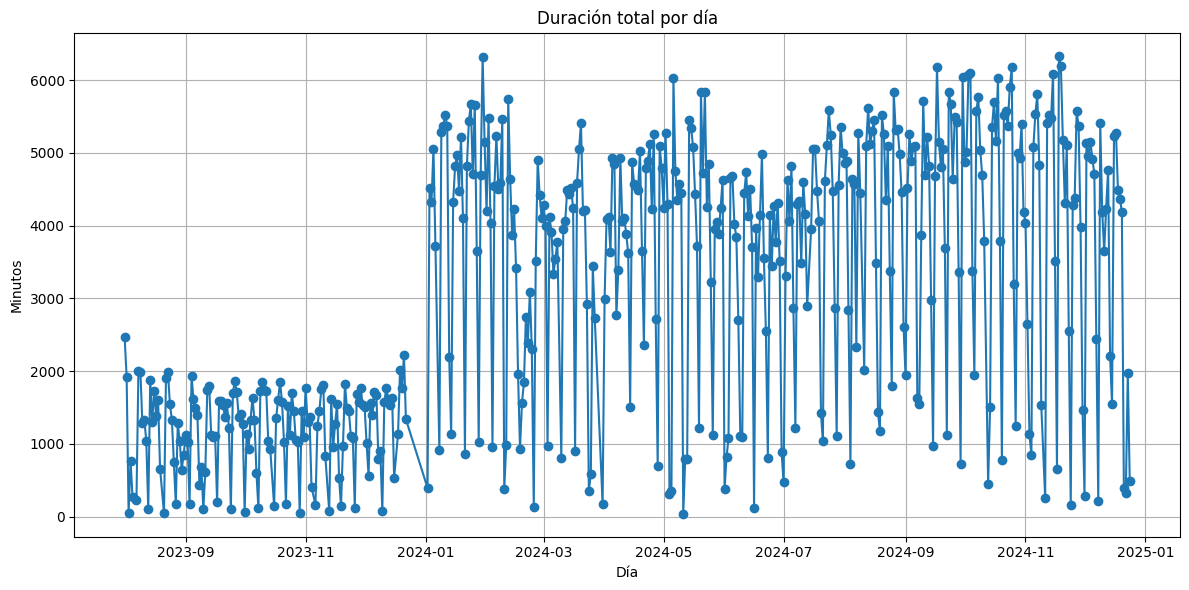

In [247]:
# Agrupado por día de inicio
uso_diario = df.groupby('dia_inicio')['duracion_min'].sum()

plt.figure(figsize=(12,6))
uso_diario.plot(marker='o')
plt.title('Duración total por día')
plt.xlabel('Día')
plt.ylabel('Minutos')
plt.grid(True)
plt.tight_layout()
plt.show()

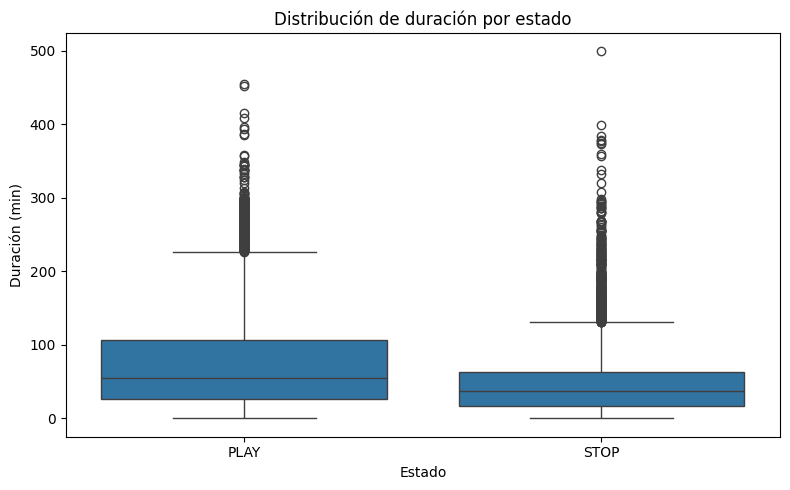

In [248]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='estado', y='duracion_min')
plt.title('Distribución de duración por estado')
plt.xlabel('Estado')
plt.ylabel('Duración (min)')
plt.tight_layout()
plt.show()

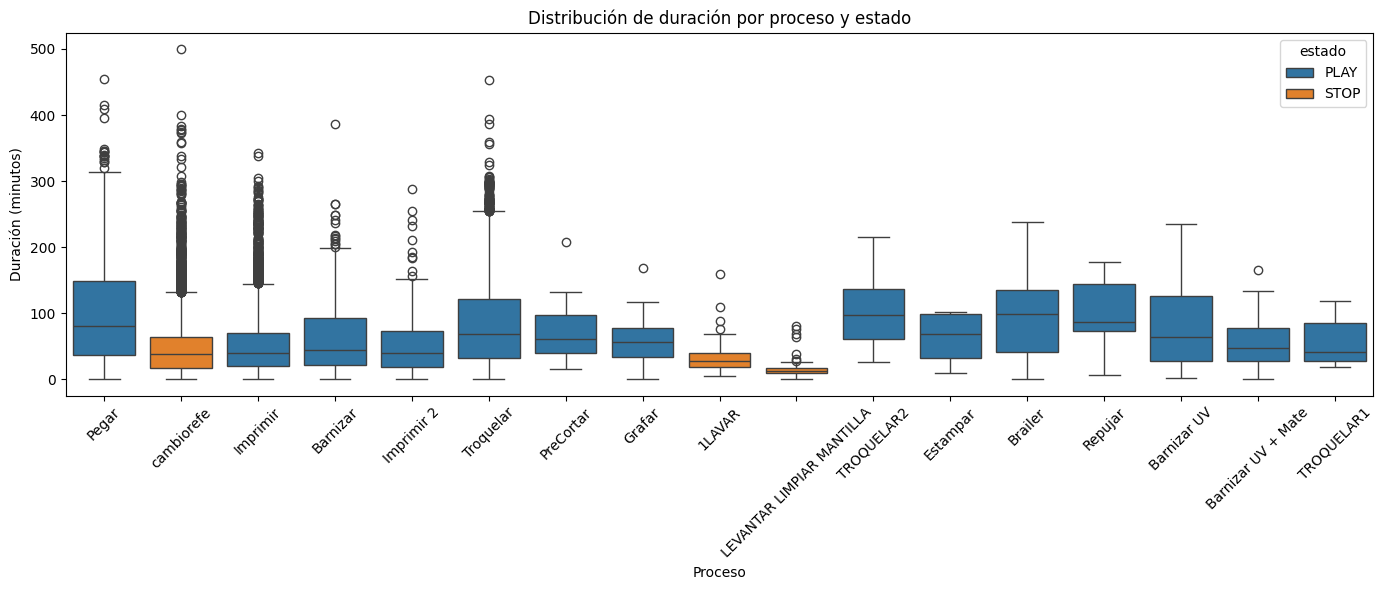

In [249]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='proceso', y='duracion_min', hue='estado')
plt.title('Distribución de duración por proceso y estado')
plt.xlabel('Proceso')
plt.ylabel('Duración (minutos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


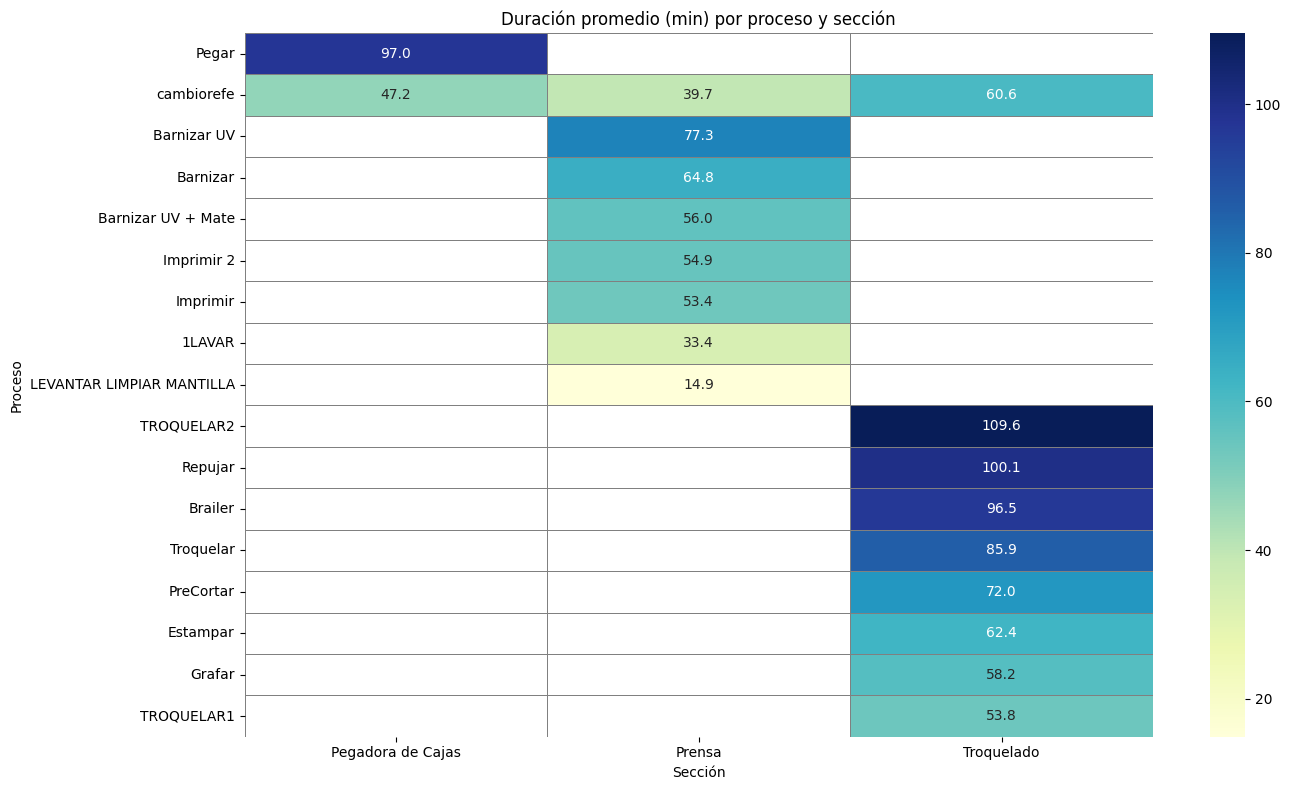

In [250]:
# Agrupar por proceso y sección
pivot = df.groupby(['proceso', 'seccion'])['duracion_min'].mean().unstack()

# Opcional: ordenar por duración total para mayor claridad
pivot = pivot.sort_values(by=pivot.columns.tolist(), ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Duración promedio (min) por proceso y sección')
plt.xlabel('Sección')
plt.ylabel('Proceso')
plt.tight_layout()
plt.show()


In [251]:
df.head(10)

,pedido,op,referencia,maquina,seccion,proceso,usuario,estado,fabricadas,fecha_inicio,fecha_fin,duracion_sec,duracion_min,dia_inicio,hora_inicio,dia_semana_inicio,dia_fin,hora_fin,dia_semana_fin
0,25301,6362,PT-0000001709,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,Pegar,dcardona,PLAY,12000.0,2024-01-28 12:07:29,2024-01-28 12:35:45,1696.0,28.27,2024-01-28,12,Sunday,2024-01-28,12,Sunday
1,25301,6362,PT-0000001709,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,cambiorefe,dcardona,STOP,0.0,2024-01-28 11:49:01,2024-01-28 12:07:29,1108.0,18.47,2024-01-28,11,Sunday,2024-01-28,12,Sunday
2,26146,7258,PT-0000000197,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,Pegar,dcardona,PLAY,28000.0,2024-01-29 07:29:18,2024-01-29 08:18:30,2952.0,49.20,2024-01-29,7,Monday,2024-01-29,8,Monday
3,26146,7258,PT-0000000197,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,cambiorefe,dcardona,STOP,0.0,2024-01-29 06:53:59,2024-01-29 07:29:18,2119.0,35.32,2024-01-29,6,Monday,2024-01-29,7,Monday
4,26550,7685,PT-0000001846,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,jhenao,PLAY,24660.0,2023-08-24 00:15:33,2023-08-24 00:49:30,2037.0,33.95,2023-08-24,0,Thursday,2023-08-24,0,Thursday
5,26550,7685,PT-0000001846,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,jhenao,STOP,0.0,2023-08-24 00:11:56,2023-08-24 00:15:33,217.0,3.62,2023-08-24,0,Thursday,2023-08-24,0,Thursday
6,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,cpiedrahit,PLAY,4200.0,2023-08-28 00:31:58,2023-08-28 01:01:06,1748.0,29.13,2023-08-28,0,Monday,2023-08-28,1,Monday
7,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,cpiedrahit,PLAY,3320.0,2023-08-28 01:56:18,2023-08-28 02:28:50,1952.0,32.53,2023-08-28,1,Monday,2023-08-28,2,Monday
8,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,cpiedrahit,STOP,0.0,2023-08-27 22:41:15,2023-08-27 23:59:59,4724.0,78.73,2023-08-27,22,Sunday,2023-08-27,23,Sunday
9,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,cpiedrahit,STOP,0.0,2023-08-28 00:00:00,2023-08-28 00:18:40,1120.0,18.67,2023-08-28,0,Monday,2023-08-28,0,Monday


       duracion_sec  duracion_min    fabricadas
count  23651.000000  23651.000000  2.365000e+04
mean    3782.270390     63.038708  2.317772e+04
std     3475.559205     57.925187  7.418890e+04
min        0.000000      0.000000  0.000000e+00
25%     1317.000000     21.950000  0.000000e+00
50%     2717.000000     45.280000  0.000000e+00
75%     5137.500000     85.625000  1.798500e+04
max    29969.000000    499.480000  4.430100e+06


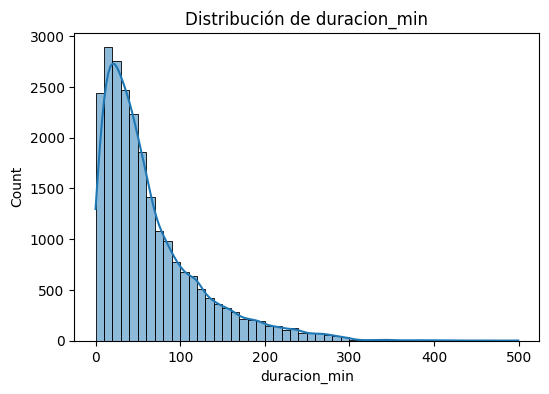

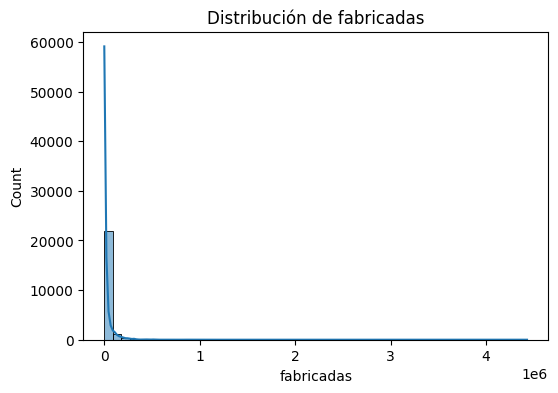

In [252]:
# Estadísticas básicas
print(df[['duracion_sec', 'duracion_min', 'fabricadas']].describe())

# Distribuciones
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['duracion_min', 'fabricadas']:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

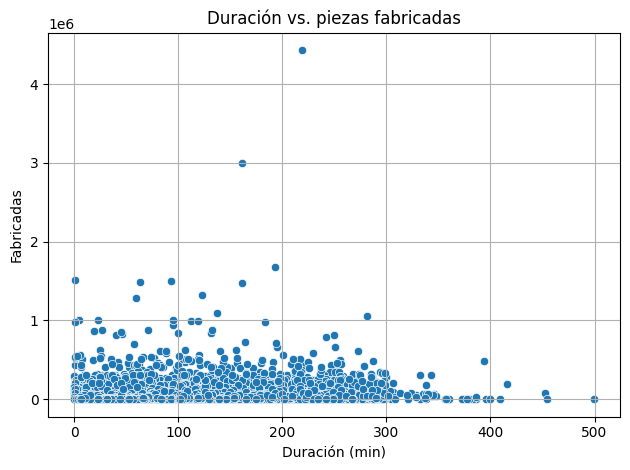

              duracion_min  duracion_sec  fabricadas
duracion_min      1.000000      0.999998     0.24758
duracion_sec      0.999998      1.000000     0.24758
fabricadas        0.247580      0.247580     1.00000


In [253]:
sns.scatterplot(data=df, x='duracion_min', y='fabricadas')
plt.title('Duración vs. piezas fabricadas')
plt.xlabel('Duración (min)')
plt.ylabel('Fabricadas')
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlación numérica
print(df[['duracion_min', 'duracion_sec', 'fabricadas']].corr())

In [254]:
df.head()

,pedido,op,referencia,maquina,seccion,proceso,usuario,estado,fabricadas,fecha_inicio,fecha_fin,duracion_sec,duracion_min,dia_inicio,hora_inicio,dia_semana_inicio,dia_fin,hora_fin,dia_semana_fin
0,25301,6362,PT-0000001709,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,Pegar,dcardona,PLAY,12000.0,2024-01-28 12:07:29,2024-01-28 12:35:45,1696.0,28.27,2024-01-28,12,Sunday,2024-01-28,12,Sunday
1,25301,6362,PT-0000001709,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,cambiorefe,dcardona,STOP,0.0,2024-01-28 11:49:01,2024-01-28 12:07:29,1108.0,18.47,2024-01-28,11,Sunday,2024-01-28,12,Sunday
2,26146,7258,PT-0000000197,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,Pegar,dcardona,PLAY,28000.0,2024-01-29 07:29:18,2024-01-29 08:18:30,2952.0,49.20,2024-01-29,7,Monday,2024-01-29,8,Monday
3,26146,7258,PT-0000000197,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,cambiorefe,dcardona,STOP,0.0,2024-01-29 06:53:59,2024-01-29 07:29:18,2119.0,35.32,2024-01-29,6,Monday,2024-01-29,7,Monday
4,26550,7685,PT-0000001846,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,jhenao,PLAY,24660.0,2023-08-24 00:15:33,2023-08-24 00:49:30,2037.0,33.95,2023-08-24,0,Thursday,2023-08-24,0,Thursday


*Ingeniería de variables*

In [255]:
df_char = df.copy()

df_char['estado'] = df_char['estado'].str.strip().str.lower()

#Eficiencia por minuto
df_char['eficiencia_piezas_por_min'] = df_char.apply(
    lambda row: row['fabricadas'] / row['duracion_min']
    if row['estado'] == 'play' and row['duracion_min'] > 0 else np.nan, axis=1
)

In [274]:
# Clasificar el turno a partir de la hora
def clasificar_turno(hora):
    if 6 <= hora < 14:
        return 'Mañana'
    elif 14 <= hora < 22:
        return 'Tarde'
    else:
        return 'Noche'

df_char['turno'] = df_char['hora_inicio'].apply(clasificar_turno)
orden_turnos = ['Mañana', 'Tarde', 'Noche']
df_char['turno'] = pd.Categorical(df_char['turno'], categories=orden_turnos, ordered=True)

In [257]:
# Calcular promedio de duración por proceso, solo para estado 'play'
promedios_por_proceso_play = df_char[df_char['estado'] == 'play'].groupby('proceso')['duracion_min'].mean()

In [258]:
# Mapear al dataframe completo (esto permite que cada fila tenga el promedio de su proceso)
df_char['promedio_duracion_proceso_play'] = df_char['proceso'].map(promedios_por_proceso_play)

In [262]:
# Calcular la relación entre duración individual y el promedio del proceso (solo útil si ese promedio existe)
df_char['duracion_vs_proceso'] = df_char['duracion_min'] / df_char['promedio_duracion_proceso_play']


In [267]:
df_char[df_char['estado'] == 'play'].head(20)

,pedido,op,referencia,maquina,seccion,proceso,usuario,estado,fabricadas,fecha_inicio,...,dia_inicio,hora_inicio,dia_semana_inicio,dia_fin,hora_fin,dia_semana_fin,eficiencia_piezas_por_min,turno,promedio_duracion_proceso_play,duracion_vs_proceso
0,25301,6362,PT-0000001709,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,Pegar,dcardona,play,12000.0,2024-01-28 12:07:29,...,2024-01-28,12,Sunday,2024-01-28,12,Sunday,424.478245,Mañana,97.020265,0.291382
2,26146,7258,PT-0000000197,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,Pegar,dcardona,play,28000.0,2024-01-29 07:29:18,...,2024-01-29,7,Monday,2024-01-29,8,Monday,569.105691,Mañana,97.020265,0.507111
4,26550,7685,PT-0000001846,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,jhenao,play,24660.0,2023-08-24 00:15:33,...,2023-08-24,0,Thursday,2023-08-24,0,Thursday,726.362297,Noche,53.432036,0.635387
6,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,cpiedrahit,play,4200.0,2023-08-28 00:31:58,...,2023-08-28,0,Monday,2023-08-28,1,Monday,144.181256,Noche,53.432036,0.545179
7,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,cpiedrahit,play,3320.0,2023-08-28 01:56:18,...,2023-08-28,1,Monday,2023-08-28,2,Monday,102.059637,Noche,53.432036,0.608811
11,26845,7999,PT-0000001846,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,jhenao,play,0.0,2023-08-23 00:03:14,...,2023-08-23,0,Wednesday,2023-08-23,1,Wednesday,0.000000,Noche,53.432036,1.082310
12,26845,7999,PT-0000001846,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,jhenao,play,0.0,2023-08-23 01:39:10,...,2023-08-23,1,Wednesday,2023-08-23,2,Wednesday,0.000000,Noche,53.432036,0.408931
13,26845,7999,PT-0000001846,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,jhenao,play,36000.0,2023-08-23 02:15:28,...,2023-08-23,2,Wednesday,2023-08-23,2,Wednesday,2762.854950,Noche,53.432036,0.243861
16,27043,8206,PT-0000002045,MAQR700 - Maquina R700 6 color + barniz,Prensa,Imprimir,mmartinez,play,144000.0,2023-08-02 15:10:34,...,2023-08-02,15,Wednesday,2023-08-02,16,Wednesday,1652.702858,Tarde,53.432036,1.630670
17,27043,8206,PT-0000002045,MAQR700 - Maquina R700 6 color + barniz,Prensa,Imprimir,falzate,play,0.0,2023-08-02 17:08:35,...,2023-08-02,17,Wednesday,2023-08-02,17,Wednesday,0.000000,Tarde,53.432036,0.503818


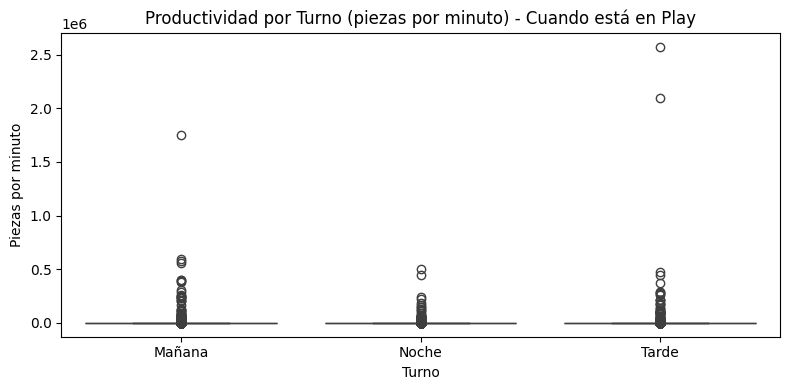

In [268]:
plt.figure(figsize=(8, 4))
sns.boxplot(df_char[df_char['estado'] == 'play'], x='turno', y='eficiencia_piezas_por_min')
plt.title('Productividad por Turno (piezas por minuto) - Cuando está en Play')
plt.xlabel('Turno')
plt.ylabel('Piezas por minuto')
plt.tight_layout()
plt.show()

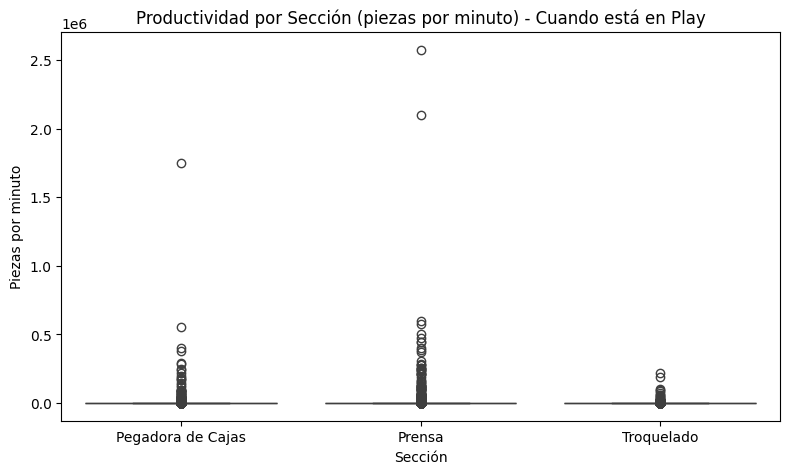

In [271]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_char[df_char['estado'] == 'play'], x='seccion', y='eficiencia_piezas_por_min')
plt.title('Productividad por Sección (piezas por minuto) - Cuando está en Play')
plt.xlabel('Sección')
plt.ylabel('Piezas por minuto')
plt.tight_layout()
plt.show()

C:\Users\yosse\AppData\Local\Temp\ipykernel_24620\2160758589.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_sec_turno = df_char.pivot_table(


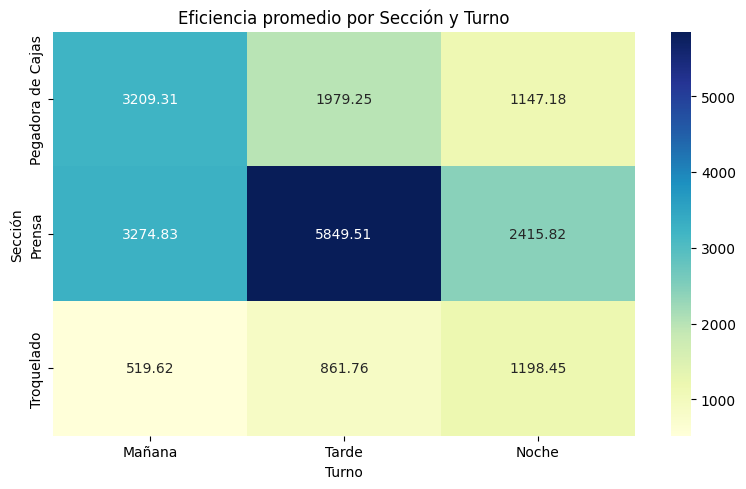

In [275]:
heatmap_sec_turno = df_char.pivot_table(
    index='seccion', columns='turno', values='eficiencia_piezas_por_min', aggfunc='mean')

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_sec_turno, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Eficiencia promedio por Sección y Turno')
plt.xlabel('Turno')
plt.ylabel('Sección')
plt.tight_layout()
plt.show()

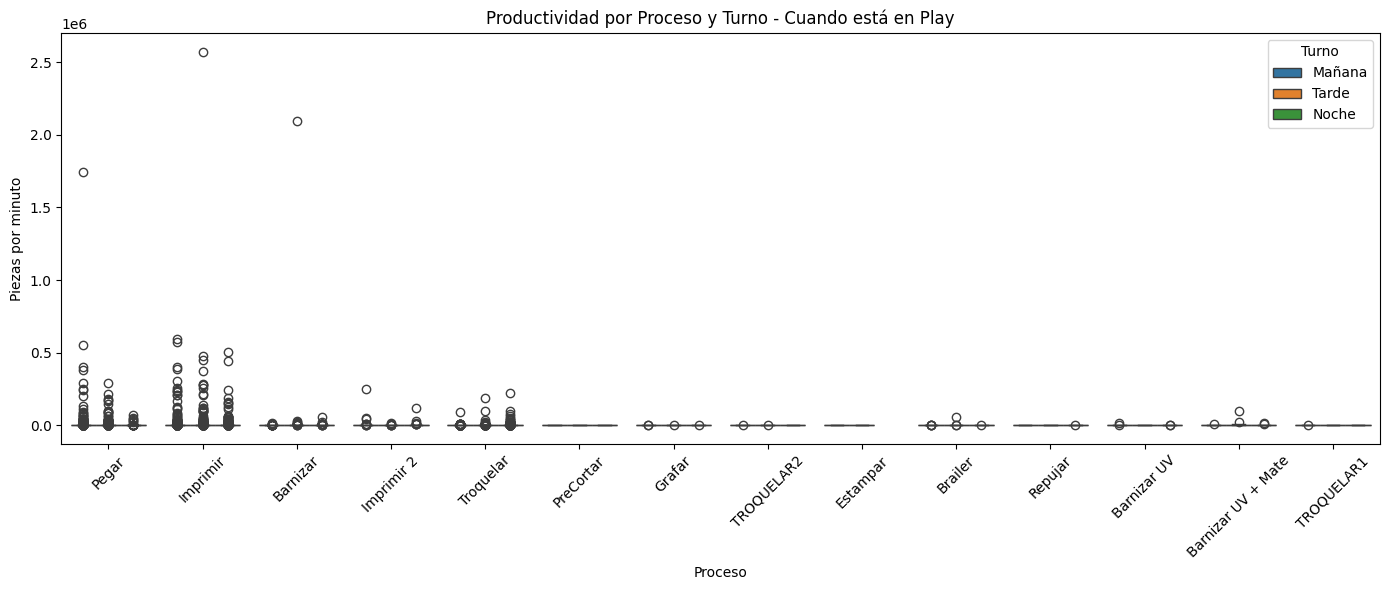

In [281]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_char[df_char['estado'] == 'play'],
    x='proceso',
    y='eficiencia_piezas_por_min',
    hue='turno'
)
plt.title('Productividad por Proceso y Turno - Cuando está en Play')
plt.xlabel('Proceso')
plt.ylabel('Piezas por minuto')
plt.xticks(rotation=45)
plt.legend(title='Turno')
plt.tight_layout()
plt.show()

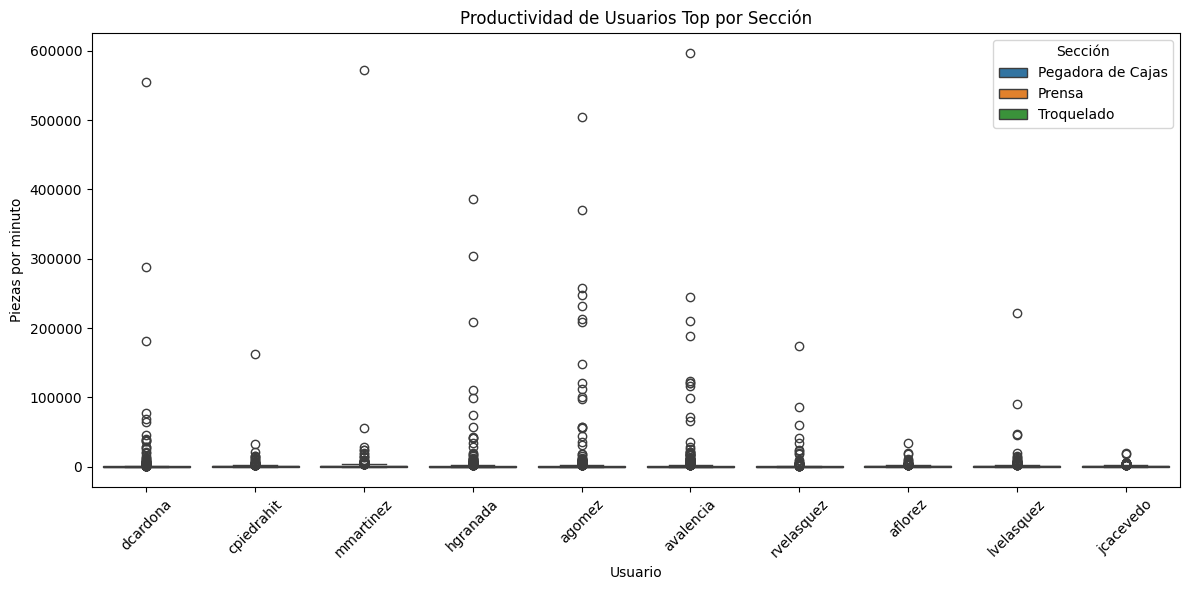

In [282]:
usuarios_top = df_char[df_char['estado'] == 'play']['usuario'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_char[(df_char['estado'] == 'play') & (df_char['usuario'].isin(usuarios_top))],
    x='usuario',
    y='eficiencia_piezas_por_min',
    hue='seccion'
)
plt.title('Productividad de Usuarios Top por Sección')
plt.xlabel('Usuario')
plt.ylabel('Piezas por minuto')
plt.xticks(rotation=45)
plt.legend(title='Sección')
plt.tight_layout()
plt.show()

C:\Users\yosse\AppData\Local\Temp\ipykernel_24620\418316137.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['dia_inicio', 'turno'])['eficiencia_piezas_por_min']


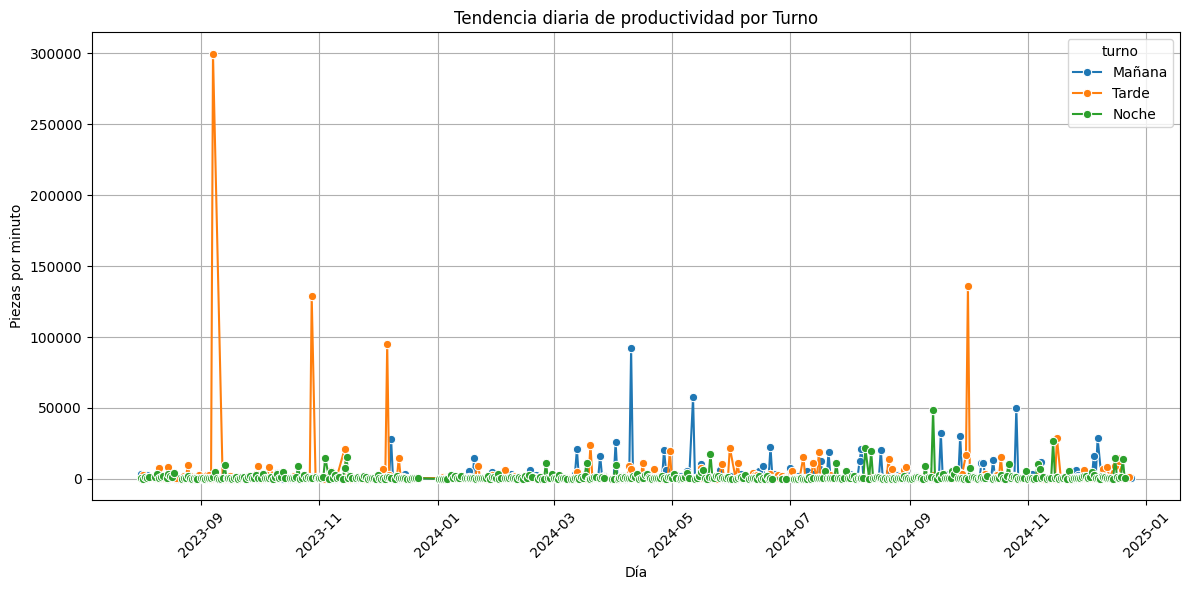

In [283]:
df_diaria_turno = (
    df_char[df_char['estado'] == 'play']
    .groupby(['dia_inicio', 'turno'])['eficiencia_piezas_por_min']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_diaria_turno,
    x='dia_inicio',
    y='eficiencia_piezas_por_min',
    hue='turno',
    marker='o'
)
plt.title('Tendencia diaria de productividad por Turno')
plt.xlabel('Día')
plt.ylabel('Piezas por minuto')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()